# Load and plot RMSE's

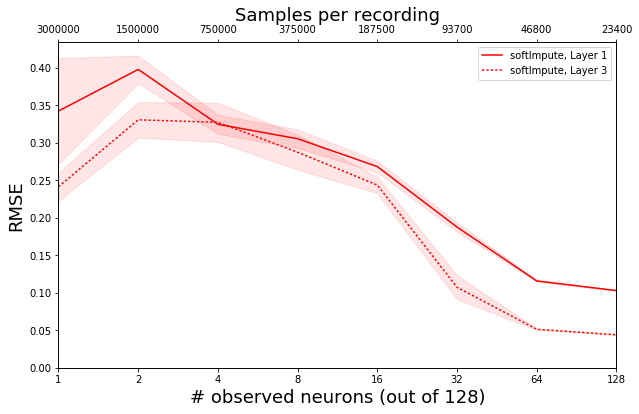

In [17]:
import matplotlib.pyplot as pl
%matplotlib inline
import numpy as np
import pickle

figName = 'figures/RMSEs_softImpute_XGB'
x = [2**x for x in range(8)]
x = range(len(x))
fig = pl.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax1.set_xlim([0, len(x)-1])
ax2 = ax1.twiny()
#softImpute_XGB_RMSES_Layer0_nRec1_NN.dat

networks =['NN']
layers =[0,2]
nRecordings =1
methods =['softImpute_XGB']
methodLabels =['softImpute']
lstyles =['-',  '--', ':']
colors =['r', 'b', 'k', 'g', 'm', 'c']

for iMethod in range(len(methods)):
    for iNetwork in range(len(networks)):
        for iLayer in layers:
            fName = 'results/' + methods[iMethod] + '_RMSES_Layer' + str(iLayer) + '_nRec' + \
                    str(nRecordings) + '_' + networks[iNetwork] + '.dat'
            with open(fName,'rb') as f:
                rmses = pickle.load(f)
            f.close()
            y = np.mean(np.mean(rmses, axis=0), axis=0)
            y = np.reshape(y,(8))
            error = np.std(np.mean(rmses, axis=0), axis=0)
            error = np.reshape(error,(8))
            ax1.plot(x, y, label=methodLabels[iMethod]+', Layer '+ str(iLayer+1), 
                     color=colors[iMethod],linestyle=lstyles[iLayer])
            pl.fill_between(x, y-error, y+error, alpha=0.1, color  = colors[iMethod] )


legend = ax1.legend(loc='upper right', shadow=False)
ax1.set_xlabel('# observed neurons (out of 128)', fontsize=18)
ax2.set_xlabel('Samples per recording',  fontsize=18)


ax2.set_xlim(ax1.get_xlim())
ax1.set_xticklabels( [2**x for x in range(8)])
nSamples = np.divide(int(30000/nRecordings),[2**x for x in range(8)])*100

ax2.set_xticklabels(nSamples)
ax1.set_ylabel('RMSE', fontsize=18)
yl = ax1.get_ylim()
ax1.set_ylim([0, yl[1]])
#ax1.set_ylim([0, .5])

pl.draw()
pl.savefig(figName +'.pdf', format='pdf')
pl.savefig(figName +'.eps', format='eps', dpi=1000)

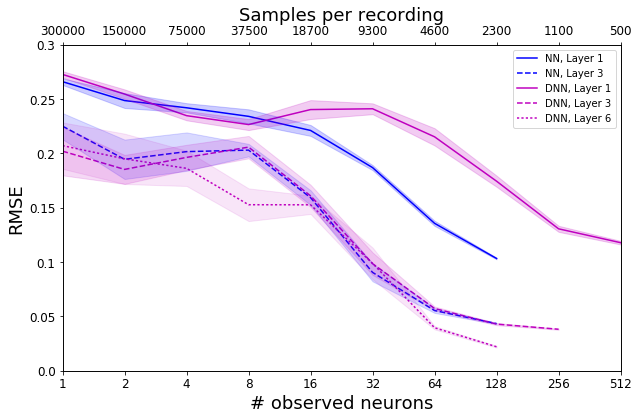

In [24]:
import matplotlib.pyplot as pl
%matplotlib inline
import numpy as np
import pickle

figName = '../partial_recordings/figures/RMSEs_NN_vs_DNN'
x = [2**x for x in range(10)]
x = range(len(x))
fig = pl.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax1.set_xlim([0, len(x)-1])
ax2 = ax1.twiny()


networks =['NN','DNN']
layers = [[0,2],[0,2,5]]
nRecordings =10
methods =['']
#methodLabels =['XGB-G', 'XGB-MP']
lstyles =['-',  '--', ':']
colors =['b', 'm', 'r', 'k', 'c','g','y']

for iMethod in range(len(methods)):
    for iNetwork in range(len(networks)):
        ls = layers[iNetwork]
        for iLayer in range(0,len(ls)):
            fName = '../new_code/' + 'RMSE_Layer' + str(ls[iLayer]) + '_' + networks[iNetwork] + '.dat'
            with open(fName,'rb') as f:
                rmses = pickle.load(f)
            f.close()
            y = np.mean(np.mean(rmses, axis=1), axis=0)
            error = np.std(np.mean(rmses, axis=1), axis=0)
            ax1.plot(x[0:rmses.shape[2]], y, label=networks[iNetwork]+', Layer '+ str(ls[iLayer]+1), 
                     color=colors[iNetwork],linestyle=lstyles[iLayer])
            pl.fill_between(x[0:rmses.shape[2]], y-error, y+error, alpha=0.2-0.05*iLayer, color=colors[iNetwork])


legend = ax1.legend(loc='upper right', shadow=False)
ax1.set_xlabel('# observed neurons', fontsize=18)
ax2.set_xlabel('Samples per recording',  fontsize=18)


ax2.set_xlim(ax1.get_xlim())
ax1.set_xticklabels([2**i for i in range(10)], fontsize=12)
nSamples = np.divide(int(30000/nRecordings),[2**i for i in range(10)])*100

ax2.set_xticklabels(nSamples, fontsize=12)
ax1.set_ylabel('RMSE', fontsize=18)
yl = ax1.get_ylim()
#ax1.set_ylim([0, yl[1]])
ax1.set_ylim([0, .3])
ax1.set_yticklabels(np.arange(0,.35,.05),fontsize=12)

pl.draw()
pl.savefig(figName +'.pdf', format='pdf')
pl.savefig(figName +'.eps', format='eps', dpi=1000)


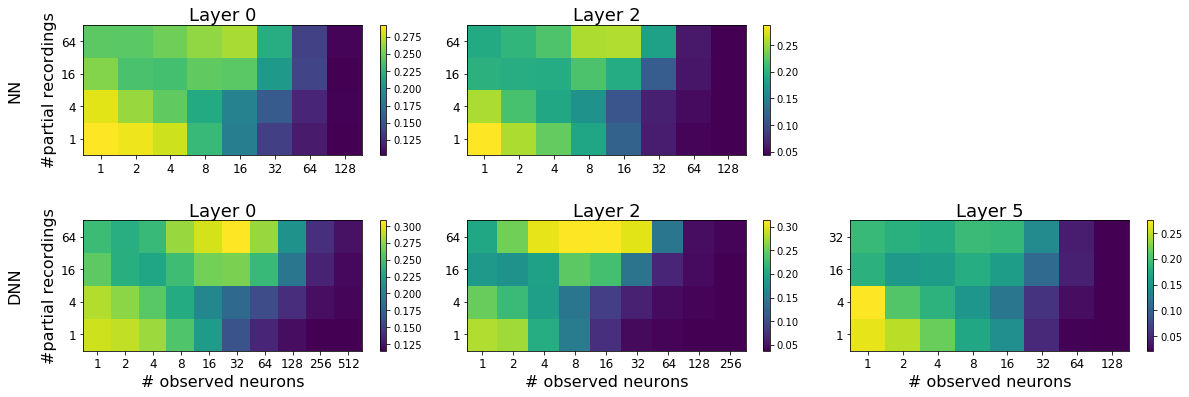

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pickle

figName = '../partial_recordings/figures/diffRec_RMSEs_NN_vs_DNN'

networks =['NN','DNN']
layers = [[0,2],[0,2,5]]
recordings = [4**i for i in range(4)]
nRecordings = len(recordings)
nSubnetSize = [8,8,0,10,9,8]
lstyles =['-',  '--', ':']
colors =['k', 'b', 'r', 'g', 'm', 'c']

fig, ax = plt.subplots(2,3, figsize=(20, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.1)

ax = ax.ravel()

i = 0
for iNetwork in range(len(networks)):
    ls = layers[iNetwork]
    for iLayer in range(0,len(ls)):
        #XGB_RMSES_Layer5diff_nRecDNN
        fName = 'results/' + 'XGB_RMSES_Layer' + str(ls[iLayer]) + 'diff_nRec' + networks[iNetwork] + '.dat'
        with open(fName,'rb') as f:
            rmses = pickle.load(f)
        f.close()
                        
        RMSE = np.transpose(np.mean(np.mean(rmses, axis=1), axis=0))
        cax = ax[i].pcolor(RMSE)
        #fig.colorbar(cax)
        fig.colorbar(cax, ax=ax[i])
        ax[i].set_xticks(np.arange(0.5,nSubnetSize[i]+0.5))
        subnetSize = [2**j for j in range(nSubnetSize[i])]
        ax[i].set_xticklabels(subnetSize, fontsize=12)
        ax[i].set_yticks(np.arange(0.5,nRecordings+0.5))
        ax[i].set_yticklabels(recordings, fontsize=12)
        if i==5:
            recordings = [1,4,16,32]
            ax[i].set_yticklabels(recordings, fontsize=12)
        
        ax[i].set_title('Layer ' + str(ls[iLayer]), fontsize=18)

        if i>2:
            ax[i].set_xlabel('# observed neurons', fontsize=16)
            
        if i==0:
            ax[i].set_ylabel('NN\n\n#partial recordings', fontsize=16)
            
        if i==3:
            ax[i].set_ylabel('DNN\n\n#partial recordings', fontsize=16)
        
        i += 1
        if i==2:
            fig.delaxes(ax[i])
            i += 1

        
plt.draw()
plt.savefig(figName +'.pdf', format='pdf')
plt.savefig(figName +'.eps', format='eps', dpi=1000)


In [11]:
y 

array([[ 0.34213725],
       [ 0.39753967],
       [ 0.32443529],
       [ 0.30518999],
       [ 0.26807699],
       [ 0.18745511],
       [ 0.11573723],
       [ 0.10287127]])

In [12]:
np.reshape(y,(8))

array([ 0.34213725,  0.39753967,  0.32443529,  0.30518999,  0.26807699,
        0.18745511,  0.11573723,  0.10287127])